In [60]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torchinfo import summary
from sklearn.metrics import classification_report

In [59]:
torch.manual_seed(42)

xrange = torch.arange(-50, 50, 0.5)
sig_func = torch.nn.Sigmoid()
y_pred = sig_func(xrange)

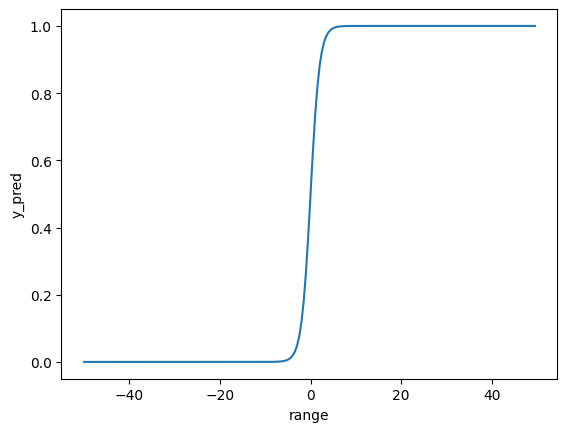

In [10]:
plt.plot(xrange.numpy(), y_pred.numpy())
plt.xlabel("range")
plt.ylabel("y_pred")
plt.show()

Creating Dataset

In [17]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=100,
)

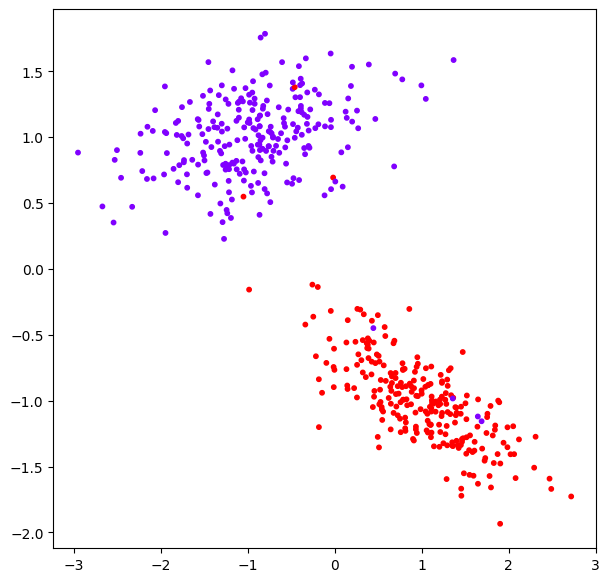

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap='rainbow')

Conversion to Pytorch Tensor

In [20]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().reshape(len(y), 1)

Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print()
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: torch.Size([400, 2])
X_test: torch.Size([100, 2])

y_train: torch.Size([400, 1])
y_test: torch.Size([100, 1])


Creating model

In [33]:
class Logistic_Regression(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layer0 = nn.Linear(in_features=num_features, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer0(x)
        x = self.sigmoid(x)
        return x

In [34]:
model = Logistic_Regression(num_features=2)

In [36]:
summary(model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [400, 1]                  --
├─Linear: 1-1                            [400, 1]                  3
├─Sigmoid: 1-2                           [400, 1]                  --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

Model Training

In [39]:
LEARNING_RATE = 0.001
EPOCHS = 4000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

def calculate_accuracy(preds, actuals):
    
    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)
        
    return accuracy

Training Loop

In [43]:
# Codeblock 16
train_losses = []
test_losses  = []
train_accs = []
test_accs  = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data)
    train_preds = model(X_train)
    train_loss  = loss_function(train_preds, y_train)
    
    # Predicting test data
    with torch.no_grad():
        test_preds = model(X_test)
        test_loss  = loss_function(test_preds, y_test)
        
    # Calculate accuracy
    train_acc = calculate_accuracy(train_preds, y_train)
    test_acc  = calculate_accuracy(test_preds, y_test)
    
    # Backward propagation
    optimizer.zero_grad()
    train_loss.backward()

    # Gradient descent step
    optimizer.step()
    
    # Store training history
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())
    
    # Print training data
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 1.173 	| Test loss: 1.198 	| Train acc: 0.17 	| Test acc: 0.15
Epoch: 100 	| Train loss: 1.087 	| Test loss: 1.112 	| Train acc: 0.25 	| Test acc: 0.23
Epoch: 200 	| Train loss: 1.009 	| Test loss: 1.033 	| Train acc: 0.35 	| Test acc: 0.34
Epoch: 300 	| Train loss: 0.937 	| Test loss: 0.96 	| Train acc: 0.45 	| Test acc: 0.42
Epoch: 400 	| Train loss: 0.872 	| Test loss: 0.894 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 500 	| Train loss: 0.813 	| Test loss: 0.834 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 600 	| Train loss: 0.76 	| Test loss: 0.78 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 700 	| Train loss: 0.712 	| Test loss: 0.731 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 800 	| Train loss: 0.669 	| Test loss: 0.686 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 900 	| Train loss: 0.63 	| Test loss: 0.646 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 1000 	| Train loss: 0.594 	| Test loss: 0.609 	| Train acc: 0.52 	| Test acc: 0.48
Epoch: 1100 	| Train loss: 0.563

Evaluation and Visualization


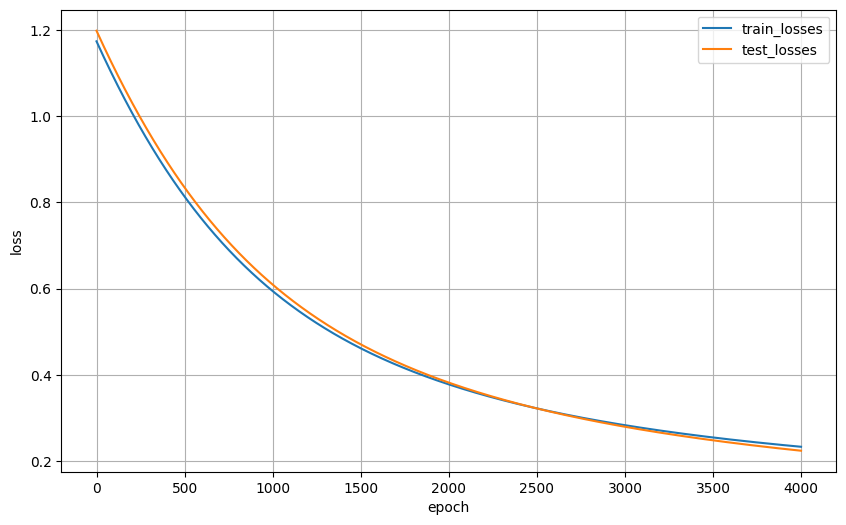

In [44]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train_losses', 'test_losses'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

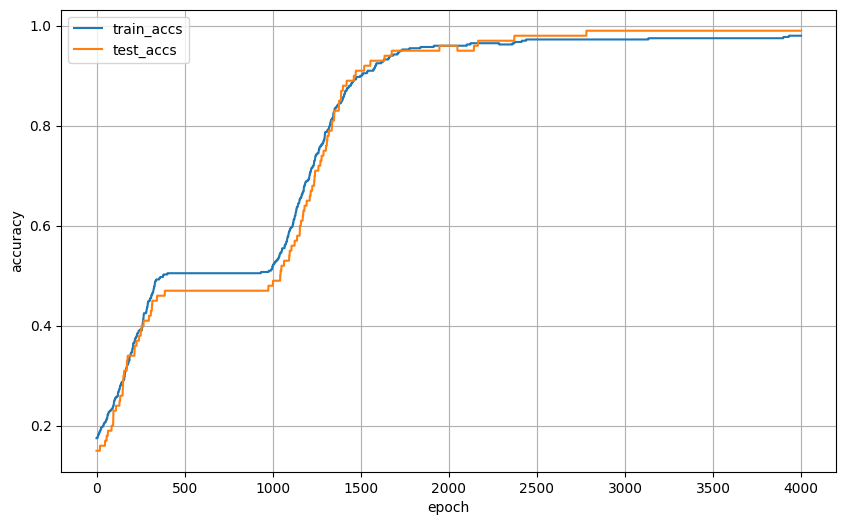

In [45]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train_accs)
plt.plot(test_accs)
plt.legend(['train_accs', 'test_accs'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()